>  # **SMS OR EMAIL SPAM CLASSIICATION BY USING NLP**

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(r'C:\Users\EXCELL  COMPUTERS\Programming_Data_Science\Ml Projects\AFAME_SPAM_CLassification\SMS Spam Dataset\spam.csv',encoding='latin-1')

In [8]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
838,spam,We tried to contact you re our offer of New Vi...,NaN,NaN,NaN
1649,ham,ITS A LAPTOP TAKE IT WITH YOU.,NaN,NaN,NaN
2734,ham,Can you do a mag meeting this avo at some point?,NaN,NaN,NaN
1438,ham,"Arms fine, how's Cardiff and uni?",NaN,NaN,NaN
505,ham,No it's waiting in e car dat's bored wat. Cos ...,NaN,NaN,NaN
4570,ham,\CHA QUITEAMUZING THATåÕSCOOL BABE,PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE J...,NaN,NaN
2934,ham,"Yeah, we got one lined up for us",NaN,NaN,NaN
2181,ham,Ok.,NaN,NaN,NaN
2871,ham,See you there!,NaN,NaN,NaN
361,ham,Oh ok no prob..,NaN,NaN,NaN


# **1. Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Columns (Unnamed: 2, Unnamed: 3, Unnamed: 4) have so much null value so we are going to drop these columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [7]:
df.sample(3)

,v1,v2
4773,ham,U repeat e instructions again. Wat's e road na...
547,ham,"Sorry that took so long, omw now"
1411,ham,somewhere out there beneath the pale moon ligh...


In [8]:
#Renaming the columns...
df.rename(columns={'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
2382,ham,I will reach before ten morning
2918,ham,Is xy in ur car when u picking me up?
4880,ham,When/where do I pick you up
646,ham,Do you mind if I ask what happened? You dont h...
1100,ham,You busy or can I come by at some point and fi...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [12]:
#Checking for misssing values...
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#checking for duplicate...
df.duplicated().sum()

403

In [14]:
#Removing Duplicates.......
df = df.drop_duplicates(keep='first')

# **2. EDA And Feature Enge...**

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
#Data is imbalanced so we have to take care of this 

In [17]:
from matplotlib import pyplot as plt

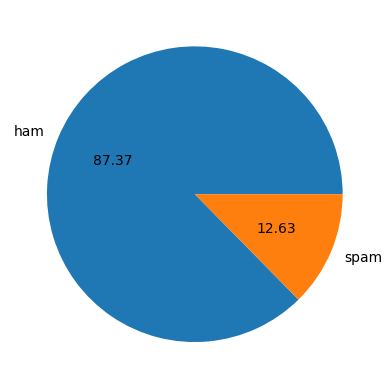

In [18]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
#Creating new Feature (num_of_Character)

In [22]:
df['num_of_character'] = df['text'].apply(len)

In [23]:
#Creating new feature (num of words)

In [24]:
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
#Creating new feature (num_sentences)

In [26]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df[['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [28]:
#Analysis where target == 0 i.e. ham......
df[df['target'] == 0][['num_of_character','num_word','num_sentence']].describe()

,num_of_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


### As we see by above result ham sms is when....
* mean(num_of_character) is approx 70
* mean(num_word) is approx 16
* mean(num_sentence) is approx 2

In [29]:
#Analysis where target == 1 i.e. spam...
df[df['target'] == 1][['num_of_character','num_word','num_sentence']].describe() 

,num_of_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


### As we see by above result spam sms is when....
* mean(num_of_character) is greater than 100
* mean(num_word) is greater than 20
* mean(num_sentence) is approx 2

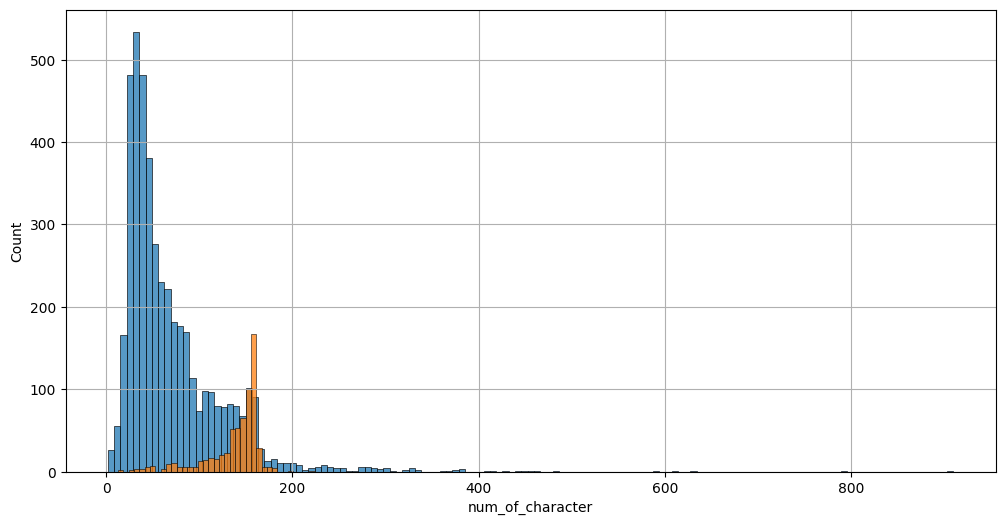

In [30]:
#Now see these conclusions by graphically
import seaborn as sns 
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_character'])
sns.histplot(df[df['target'] == 1]['num_of_character'])
plt.grid()

> As we see by graphicaly taget is depend on column (num_of_character)

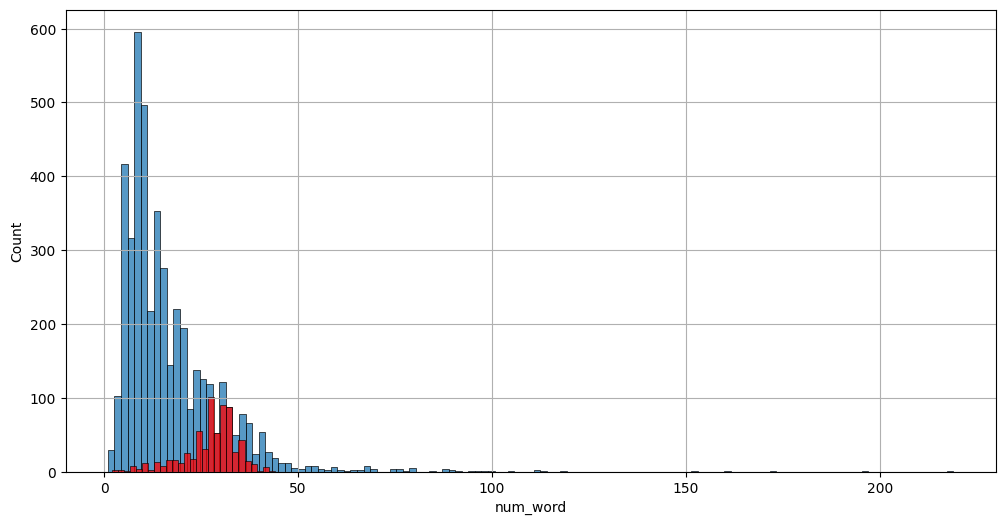

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_word'])
sns.histplot(df[df['target'] == 1]['num_word'],color='red')
plt.grid()

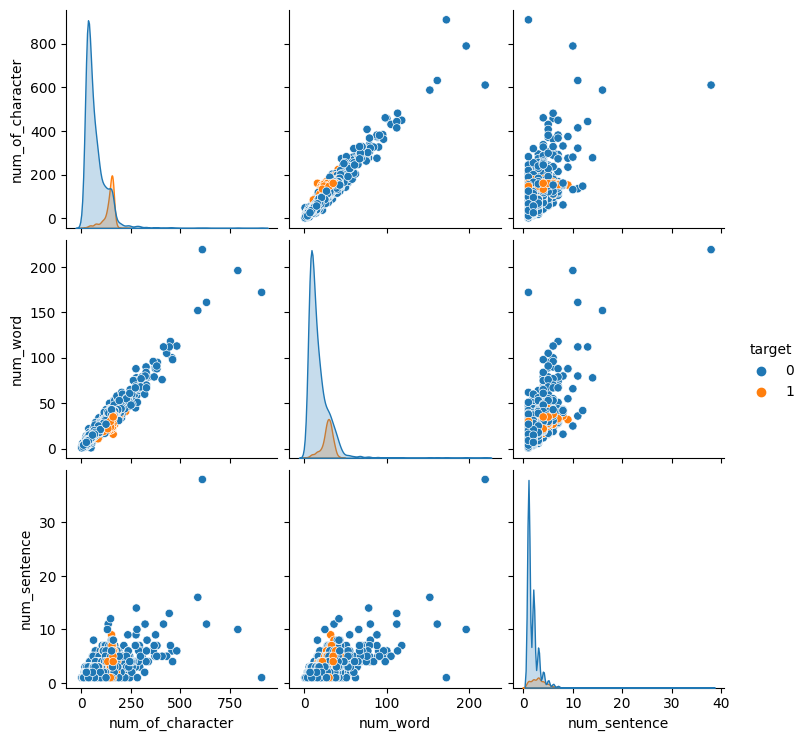

In [32]:
sns.pairplot(df,hue='target')
plt.grid()

<Axes: >

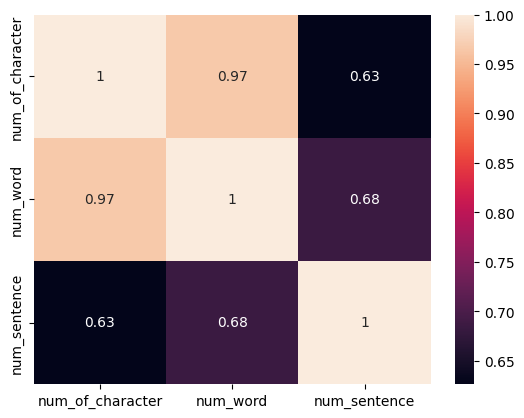

In [33]:
sns.heatmap(df[['num_of_character','num_word','num_sentence']].corr(),annot=True)

# **3. Data Preprocessing** 

* Lower Case
* Tokenization
* Removing Special Character
* Removing Stop words and punctuation
* Stemming

In [34]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [35]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
    

In [36]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [37]:
#For example how this function work actually...
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head(5)

,target,text,num_of_character,num_word,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

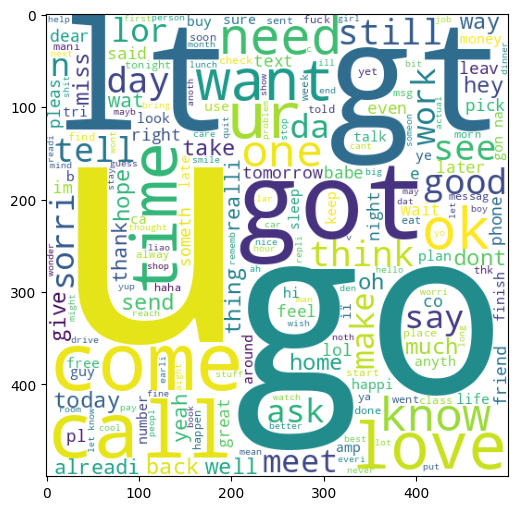

In [60]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

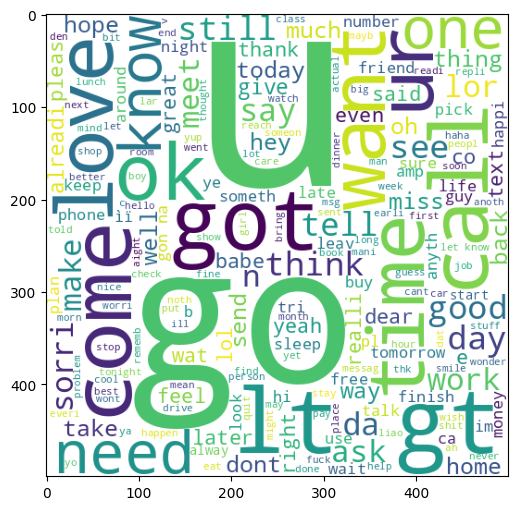

In [62]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

# **4. Model Building**

In [63]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [64]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
x.shape

(5169, 4000)

In [66]:
y = df['target'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 20)

In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1.0)
bnb = BernoulliNB()

In [80]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
0.5


In [81]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
1.0


In [82]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9758220502901354
0.9763779527559056


In [83]:
import pickle
pickle.dump(tfidf,open('nlp_vectorizer.pkl','wb'))
pickle.dump(mnb,open('nlp_model.pkl','wb'))

# **5. Testing**

In [84]:
pred = mnb.predict(x_test)

In [85]:
pred

array([0, 0, 1, ..., 0, 0, 0])

In [86]:
y_test

array([0, 0, 1, ..., 0, 0, 0])